   income  debt_to_income_ratio  credit_utilization  loan_amount  \
0  141958              0.309528            0.025642        42862   
1   35795              0.813795            0.341248        34132   
2   20860              0.684731            0.380196        20503   
3  123694              0.162617            0.398823        49456   
4  148106              0.910927            0.580172        35631   

   num_open_accounts  payment_history_score  age  employment_length  \
0                  4             694.416313   66                 23   
1                  6             770.872874   30                 10   
2                  7             496.222791   35                 34   
3                 13             716.605445   30                 22   
4                 11             462.289792   66                 16   

   previous_defaults  creditworthy  
0                  1             1  
1                  1             1  
2                  1             1  
3               

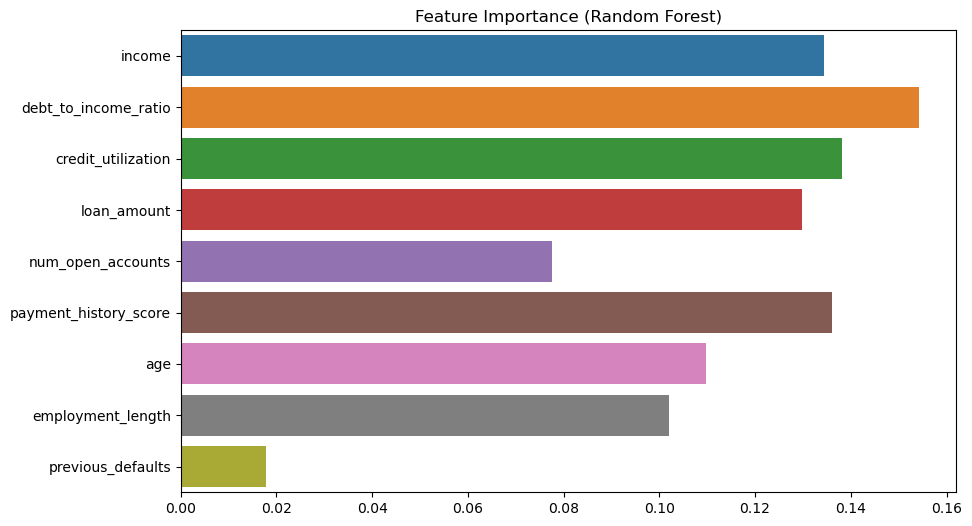

In [2]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#  2. Create Dummy Dataset
np.random.seed(42)
data = pd.DataFrame({
    "income": np.random.randint(20000, 150000, 1000),
    "debt_to_income_ratio": np.random.uniform(0, 1, 1000),
    "credit_utilization": np.random.uniform(0, 1, 1000),
    "loan_amount": np.random.randint(1000, 50000, 1000),
    "num_open_accounts": np.random.randint(1, 15, 1000),
    "payment_history_score": np.random.uniform(300, 850, 1000),
    "age": np.random.randint(18, 70, 1000),
    "employment_length": np.random.randint(0, 40, 1000),
    "previous_defaults": np.random.choice([0, 1], 1000),
    "creditworthy": np.random.choice([0, 1], 1000)  # Target
})
print(data.head())

# 3. Feature/Target Split
X = data.drop("creditworthy", axis=1)
y = data["creditworthy"]

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Preprocessing (Scaling + Imputation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    
    results.append([name, acc, prec, rec, f1, roc])
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# 7. Compare Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
print("\nModel Comparison:\n", results_df)

# 8. Feature Importance (Random Forest)
best_model = models["Random Forest"]
importances = best_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()
